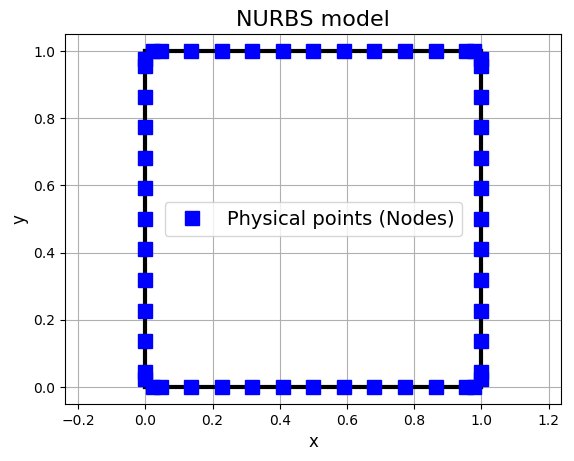

PyObject <matplotlib.legend.Legend object at 0x7f391965ce10>

In [1]:
# Boundary element method implementation for the Laplace equation using NURBS bidimensional elements
# Author: Álvaro Campos Ferreira - alvaro.campos.ferreira@gmail.com
# Necessary Modules: SpecialFunctions.jl
# using SpecialFunctions
using PyPlot
include("dep.jl") # Includes the dependencies
include("dad_1.jl") # Includes the data file containing the geometry and physical boundary conditions of the problem
# Characteristics of the problem: Square domain with imposed temperature in two opposite faces and imposed null temperature flux at the other two faces. 
k=1	# Heat conductivity
collocCoord,nnos,crv,dcrv,CDC,E = dad_0()# Geometric and physical information of the problem

#Building the problems matrices
H, G = calcula_iso_POT(collocCoord,nnos,crv,dcrv,E,k) # Influence matrices
A,b= aplica_CDCiso(G,H,CDC,E);	# Applying boundary conditions
x=A\b; # Evaluating unknown values
Tc,qc=monta_Teqiso(CDC,x); # Separating temperature from flux
# Applying NURBS basis functions to the values of temperature and flux
T=E*Tc;
q=E*qc;

# Domain points
PONTOS_int = [1 0.5 0.5]
fc = 0; finc = 0;
Hp,Gp,phi_pint = calc_phi_pint_nurbs_POT(PONTOS_int,collocCoord,nnos,crv,dcrv,k,Tc,qc);

# Graphics
close("all")
mostra_geo(crv)
plot(collocCoord[:,1],collocCoord[:,2],marker="s",markersize=10,linestyle="none",color="blue",label = "Physical points (Nodes)")
axis("equal")
grid(1)
PyPlot.xlabel("x",fontsize="12.0")
PyPlot.ylabel("y",fontsize="12.0")
title("NURBS model",fontsize="16.0")
legend(fontsize="14.0",loc="best")

In [2]:
phi_pint

1-element Array{Complex{Float64},1}:
 0.5+0.0im

In [20]:
q

52-element Array{Complex{Float64},1}:
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
      0.0+0.0im
         ⋮     
  1.01175+0.0im
  1.00227+0.0im
  1.00471+0.0im
  1.00375+0.0im
   1.0039+0.0im
  1.00379+0.0im
   1.0039+0.0im
  1.00375+0.0im
  1.00471+0.0im
  1.00227+0.0im
  1.01175+0.0im
 0.994516+0.0im

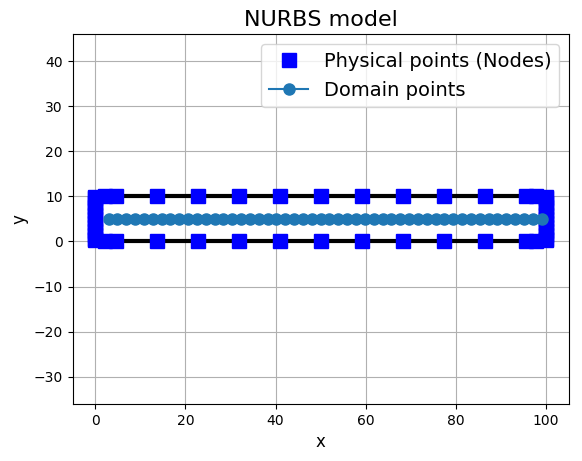

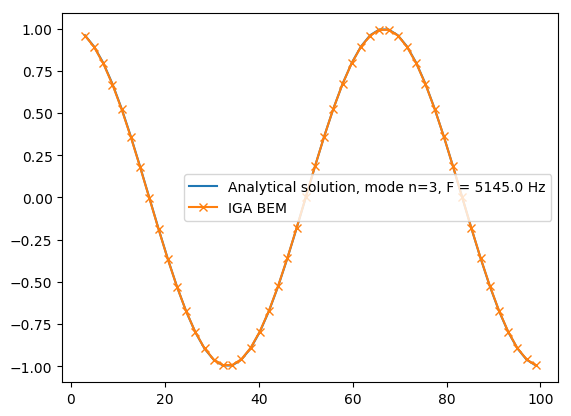

PyObject <matplotlib.legend.Legend object at 0x7f39191c16d8>

In [21]:
# Boundary element method implementation for the Laplace equation using NURBS bidimensional elements
# Author: Álvaro Campos Ferreira - alvaro.campos.ferreira@gmail.com
# Necessary Modules: SpecialFunctions.jl
using SpecialFunctions
using PyPlot
include("dep.jl") # Includes the dependencies
include("dad_1.jl") # Includes the data file containing the geometry and physical boundary conditions of the problem
# Characteristics of the problem: Square domain with imposed temperature in two opposite faces and imposed null temperature flux at the other two faces. 
F_closed(n,L,c) = pi*n*c/L # Analytical resonance frequency in rad/s
phi_closed(x,n,L,c) = cos.(n*pi*(x./L)) # Acoustic pressure distribution along the duct
c = 343*1000; # Speed of wave propagation in mm/s
n = 3; # Mode number
L = 100; # Length of the duct in mm
d = 10; # Diameter of the duct in mm
k = F_closed(n,L,c)/c; # Resonance wave number

collocCoord,nnos,crv,dcrv,CDC,E = dad_helm()# Geometric and physical information of the problem

#Building the problems matrices
H, G = calcula_iso(collocCoord,nnos,crv,dcrv,E,k) # Influence matrices
A,b= aplica_CDCiso(G,H,CDC,E);	# Applying boundary conditions
x=A\b; # Evaluating unknown values
Tc,qc=monta_Teqiso(CDC,x); # Separating temperature from flux
# Applying NURBS basis functions to the values of temperature and flux
T=E*Tc;
q=E*qc;

# Domain points
n_pint = 50; # Number of domain points
PONTOS_int = zeros(n_pint,3)
phi_analytical = zeros(n_pint)
dx = 1.0;
dy = 5.0;
passo = (L-2*dx)/(n_pint);
for i = 1:n_pint
	PONTOS_int[i,:] = [i dx+i*passo dy];
end


fc = 0; finc = 0;
Hp,Gp,phi_pint = calc_phi_pint_nurbs(PONTOS_int,collocCoord,nnos,crv,dcrv,k,Tc,qc);

# Graphics
close("all")
mostra_geo(crv)
plot(collocCoord[:,1],collocCoord[:,2],marker="s",markersize=10,linestyle="none",color="blue",label = "Physical points (Nodes)")
plot(PONTOS_int[:,2],PONTOS_int[:,3],marker="o",markersize=8,label="Domain points")
axis("equal")
grid(1)
PyPlot.xlabel("x",fontsize="12.0")
PyPlot.ylabel("y",fontsize="12.0")
title("NURBS model",fontsize="16.0")
legend(fontsize="14.0",loc="best")

# Plot domain point solution and analytical solution
figure()
plot(PONTOS_int[:,2],phi_closed(PONTOS_int[:,2],n,L,c),label="Analytical solution, mode n=$(n), F = $(F_closed(n,L,c)/(2*pi)) Hz")
plot(PONTOS_int[:,2],real(phi_pint),marker="x",label="IGA BEM")
legend()

In [22]:
k

0.09424777960769379